In [11]:
pip install pandas-datareader -q

In [12]:
import pandas_datareader as pdr # access fred
import pandas as pd
import requests # data from api
import plotly.express as px # visualize
from datetime import datetime

In [13]:
df1 = pdr.DataReader('ASPUS','fred','2000-01-01','2024-04-30')

In [14]:
df2 = pdr.DataReader('MORTGAGE30US','fred','2000-01-01','2024-04-30')

In [15]:
df3 = pdr.DataReader('MSACSR','fred','2000-01-01','2024-04-30')

In [16]:
df4=pdr.DataReader('GDP','fred','2000-01-01','2024-04-30')

In [17]:
df1=df1.reset_index()
print(df1)
df2=df2.reset_index()
print(df2)
df3=df3.reset_index()
print(df3)
df4=df4.reset_index()
print(df4)

         DATE     ASPUS
0  2000-01-01  202900.0
1  2000-04-01  202400.0
2  2000-07-01  204100.0
3  2000-10-01  212100.0
4  2001-01-01  211000.0
..        ...       ...
93 2023-04-01  503000.0
94 2023-07-01  521900.0
95 2023-10-01  498300.0
96 2024-01-01  519700.0
97 2024-04-01  502200.0

[98 rows x 2 columns]
           DATE  MORTGAGE30US
0    2000-01-07          8.15
1    2000-01-14          8.18
2    2000-01-21          8.26
3    2000-01-28          8.25
4    2000-02-04          8.25
...         ...           ...
1264 2024-03-28          6.79
1265 2024-04-04          6.82
1266 2024-04-11          6.88
1267 2024-04-18          7.10
1268 2024-04-25          7.17

[1269 rows x 2 columns]
          DATE  MSACSR
0   2000-01-01     4.3
1   2000-02-01     4.3
2   2000-03-01     4.3
3   2000-04-01     4.4
4   2000-05-01     4.4
..         ...     ...
287 2023-12-01     8.2
288 2024-01-01     8.3
289 2024-02-01     8.7
290 2024-03-01     8.2
291 2024-04-01     7.6

[292 rows x 2 columns]
    

In [18]:
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2.set_index('DATE', inplace=True)
df2 = df2.resample('QS').mean()
df2=  df2.reset_index()
print(df2)

         DATE  MORTGAGE30US
0  2000-01-01      8.256923
1  2000-04-01      8.316154
2  2000-07-01      8.020000
3  2000-10-01      7.620769
4  2001-01-01      7.006923
..        ...           ...
93 2023-04-01      6.510769
94 2023-07-01      7.040000
95 2023-10-01      7.303846
96 2024-01-01      6.748462
97 2024-04-01      6.992500

[98 rows x 2 columns]


In [19]:
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3.set_index('DATE', inplace=True)
df3 = df3.resample('QS').mean()
df3=  df3.reset_index()
print(df3)

         DATE    MSACSR
0  2000-01-01  4.300000
1  2000-04-01  4.533333
2  2000-07-01  4.166667
3  2000-10-01  3.933333
4  2001-01-01  3.766667
..        ...       ...
93 2023-04-01  7.366667
94 2023-07-01  7.566667
95 2023-10-01  8.300000
96 2024-01-01  8.400000
97 2024-04-01  7.600000

[98 rows x 2 columns]


In [20]:
import pandas as pd
import plotly.express as px

# Assuming df1 is already loaded with your data

fig = px.line(df1, x='DATE', y='ASPUS', title='Average Sales Price of Houses Sold for the United States')

trend_fig = px.scatter(df1, x='DATE', y='ASPUS', trendline='ols')
fig.add_traces(trend_fig.data)

fig.update_layout(
    title='Average Sales Price of Houses Sold with Trend Line',
    hovermode='x',
    xaxis_title='Years',
    yaxis_title='Average Sales Price (ASPUS)',
    font=dict(size=12),
    template='plotly_white'
)

# Update x-axis to show all years
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    ticklabelmode="period"
)

fig.show()

In [21]:
import pandas as pd
import plotly.express as px

# Assuming df3 is already loaded with your data

fig = px.line(df3, x='DATE', y='MSACSR', title='Monthly Supply of New Houses in the United States')

trend_fig = px.scatter(df3, x='DATE', y='MSACSR', trendline='ols')
fig.add_traces(trend_fig.data)

fig.update_layout(
    title='Monthly Ratio of Homes Listed vs. Sold',
    hovermode='x',
    xaxis_title='Years',
    yaxis_title='Months Supply',
    font=dict(size=12),
    template='plotly_white'
)

# Update x-axis to show all years
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    ticklabelmode="period"
)

fig.show()

In [24]:
import pandas as pd
import plotly.express as px

# Assuming df2 is already loaded with your data

fig = px.line(df2, x='DATE', y='MORTGAGE30US', title='Mortgage Rate')

trend_fig = px.scatter(df2, x='DATE', y='MORTGAGE30US', trendline='ols')
fig.add_traces(trend_fig.data)

fig.update_layout(
    title='30-Year Fixed Rate Mortgage Rates in the United States with Trend Line',
    hovermode='x',
    xaxis_title='Years',
    yaxis_title='Percent',
    font=dict(size=12),
    template='plotly_white'
)

# Update x-axis to show all years
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    ticklabelmode="period"
)

fig.show()

In [25]:
import pandas as pd
import plotly.express as px

# Assuming df4 is already loaded with your GDP data

fig = px.line(df4, x='DATE', y='GDP', title='GDP')

trend_fig = px.scatter(df4, x='DATE', y='GDP', trendline='ols')
fig.add_traces(trend_fig.data)

fig.update_layout(
    title='GDP',
    hovermode='x',
    xaxis_title='Years',
    yaxis_title='GDP',
    font=dict(size=12),
    template='plotly_white'
)

# Update x-axis to show all years
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    ticklabelmode="period"
)

fig.show()

In [26]:
import pandas as pd

# Assuming df1 is already daily
df1 = df1.set_index('DATE').resample('QS').mean().reset_index()  # Resample to quarterly
df2 = df2.set_index('DATE').resample('QS').mean().reset_index()  # Resample to quarterly
df3 = df3.set_index('DATE').resample('QS').mean().reset_index()  # Resample to quarterly
df4 = df4.set_index('DATE').resample('QS').mean().reset_index()  # Resample to quarterly

# Merge the DataFrames on 'DATE'
merged_df = pd.merge(df1, df2, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df3, on='DATE', how='outer')
merged_df = pd.merge(merged_df, df4, on='DATE', how='outer')

# Drop the 'DATE' column as it's not needed for the heatmap
heatmap_data = merged_df.drop('DATE', axis=1)

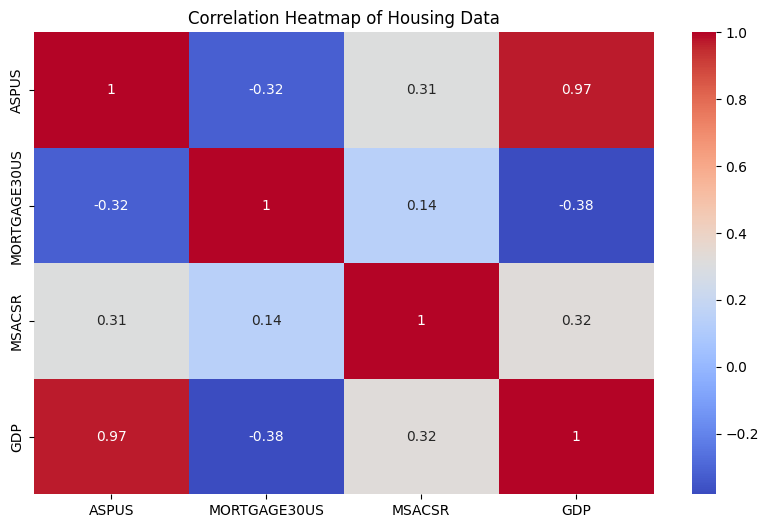

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Data')
plt.show()